In [295]:
import matplotlib.pyplot as plt
import numpy as np

In [296]:
gamma1 = gamma2 = gamma3 = gamma4 = gamma5 = 1
gamma6 = 2
eta_two = 0.05915
pikL = 1
#编队-车-坐标
x_list = [np.array([[[104.99087679, 3.0], [94.99825437, 1.0], [89.99442962, 3.0], [0, 0], [0, 0]],
                    [[119.99647456, 1.0], [114.98775328, 3.0], [109.99829432, 1.0], [99.99960152, 1.0],
                     [94.99409499, 3.0]]], dtype='float')]
v_list = [np.array([[[5.0, 0], [5., 0], [5.0, 0], [0, 0], [0, 0]], [[5.0, 0], [5., 0], [5.0, 0], [5., 0], [5.0, 0]]],
                   dtype='float')]
xL_list = [np.array([[125., 1.],
                     [125., 3.]], dtype='float')]
vL_list = [np.array([[5.1, 0.],
                     [5.1, 0.]], dtype='float')]
r_mat = np.array([[[20.0, 0],
                   [30.0, 0],
                   [35.0, 0], [0, 0], [0, 0]],
                  [[5.0, 0],
                   [10.0, 0],
                   [15.0, 0],
                   [25.0, 0],
                   [30.0, 0]]], dtype='float')
a_mat = np.array([[0, 1, 0, 0, 0],
                  [1, 0, 1, 0, 0],
                  [0, 1, 0, 1, 0],
                  [0, 0, 1, 0, 1],
                  [0, 0, 0, 1, 0]], dtype='float')
# 修改记录矩阵
t_mat = np.zeros((2, 5))

In [297]:
def dst(dot):
    return (dot[0] ** 2 + dot[1] ** 2) ** 0.5

In [298]:
times = 15
step = 1e-3

In [299]:
temp_list = [np.zeros((2, 5, 2), dtype='float')]
num = [3, 5]

In [305]:
for t in range(int(times / step),int(times / step)*2):
    xL_list.append(xL_list[-1] + vL_list[-1] * step)
    vL_list.append(vL_list[-1])
    v_mat_temp = np.zeros((2, 5, 2), dtype='float')
    c_mat_temp = np.zeros((2, 5, 2), dtype='float')
    x_mat_temp = np.zeros((2, 5, 2), dtype='float')
    for p in range(2):
        for i in range(0, num[p]):
            v_temp = np.array((0, 0), dtype="float")
            dot1 = np.array((0, 0), dtype="float")
            dot2 = np.array((0, 0), dtype="float")
            for j in range(0, num[p]):
                dot1 += a_mat[i][j] * (x_list[int(t_mat[p][j])][p][j] - x_list[int(t_mat[p][i])][p][i] +
                                       v_list[int(t_mat[p][j])][p][j] -
                                       v_list[int(t_mat[p][i])][p][i])
                dot1 -= a_mat[i][j] * (x_list[-1][p][j] - x_list[-1][p][i]) + v_list[-1][p][j] - v_list[-1][p][i]
                dot2 += dot1
            u = dst(dot1) - eta_two * dst(dot2)
            if u > 0:
                for j in range(num[p]):
                    v_temp -= a_mat[i][j] * (gamma1 * (
                            x_list[int(t_mat[p][i])][p][i] - x_list[int(t_mat[p][j])][p][j] + (
                            r_mat[p][i] - r_mat[p][j])) + gamma2 * (v_list[int(t_mat[p][i])][p][i] -
                                                                    v_list[int(t_mat[p][j])][p][j]))
                v_temp -= pikL * (gamma3 * (
                        x_list[int(t_mat[p][i])][p][i] - xL_list[int(t_mat[p][i])][p] + r_mat[p][i]) + gamma4 * (
                                          v_list[int(t_mat[p][i])][p][i] - vL_list[int(t_mat[p][i])][p]))
                t_mat[p][i] = t
            if u <= 0:
                c_mat_temp[p][i] = temp_list[-1][p][i]
            else:
                c_mat_temp[p][i] = v_temp
            v_mat_temp[p][i] = v_list[-1][p][i] + v_temp * step
            x_mat_temp[p][i] = x_list[-1][p][i] + v_list[-1][p][i] * step
    v_list.append(v_mat_temp)
    x_list.append(x_mat_temp)
    temp_list.append(c_mat_temp)

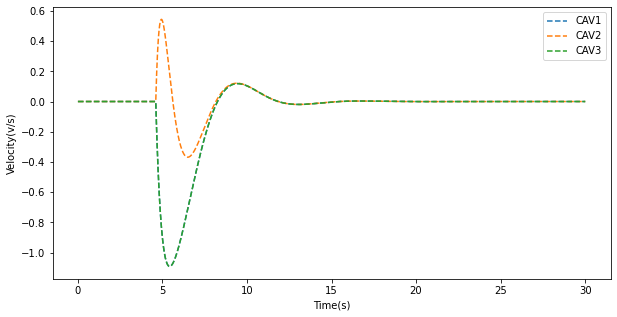

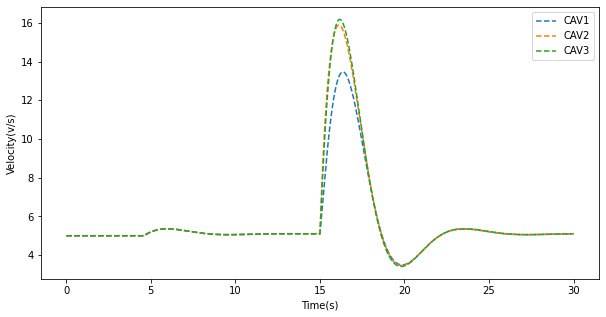

In [307]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][i][1] for t in v_list], '--')
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4"])
plt.show()

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][i][0] for t in v_list], '--')

plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["CAV1", "CAV2", "CAV3"])
plt.show()

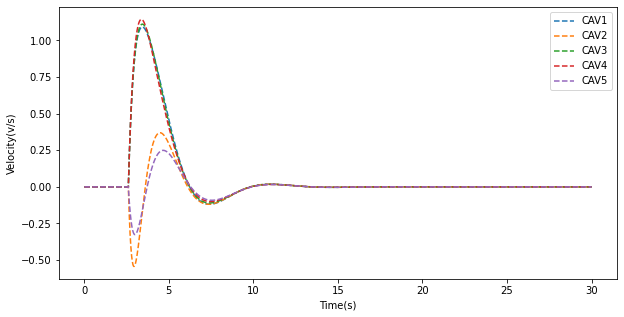

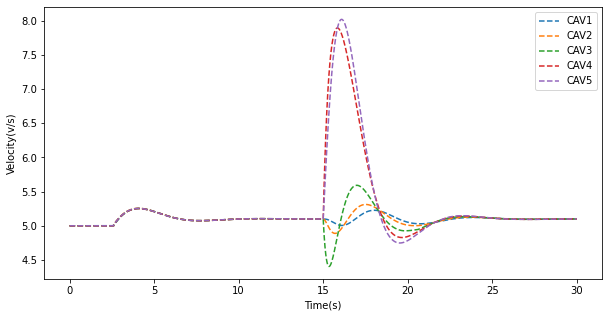

In [308]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[1][i][1] for t in v_list], '--')

plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4", "CAV5"])
plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[1][i][0] for t in v_list], '--')

plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4", "CAV5"])
plt.show()

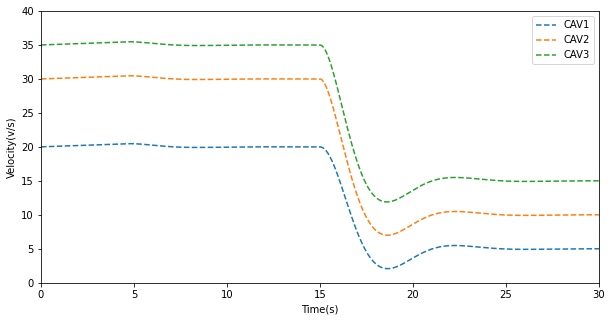

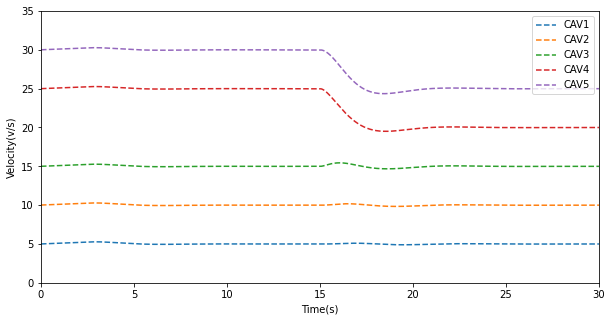

In [309]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [l[0][0] - t[0][i][0] for t, l in zip(x_list, xL_list)], '--')
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.xlim((0,30))
plt.ylim((0,40))
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4", "CAV5"])
plt.show()


plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)],[l[1][0] - t[1][i][0] for t, l in zip(x_list, xL_list)], '--')
plt.xlabel("Time(s)")
plt.ylabel("Velocity(v/s)")
plt.xlim((0,30))
plt.ylim((0,35))
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4", "CAV5"])
plt.show()

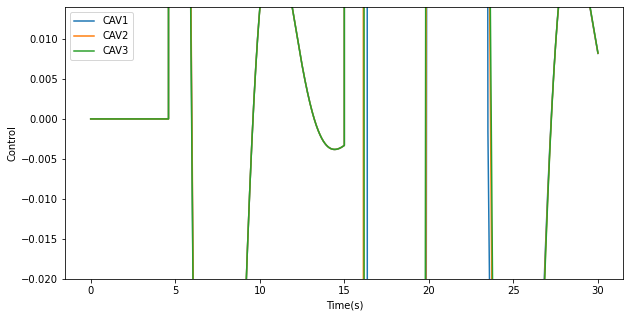

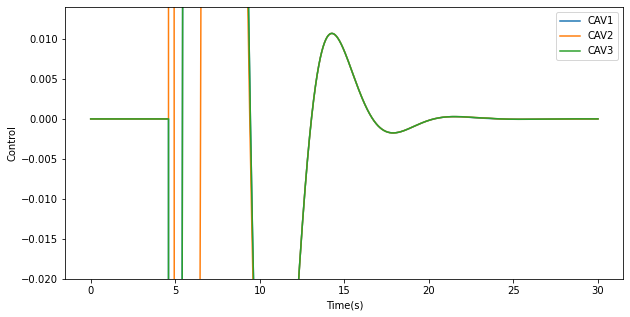

In [312]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][i][0] for t in temp_list], '-')
plt.xlabel("Time(s)")
plt.ylabel("Control")

plt.ylim((-0.02,0.014))
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4","CAV5"])
plt.show()

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot([t * step for t in range(int(times / step)*2 + 1)], [t[0][i][1] for t in temp_list], '-')
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.ylim((-0.02,0.014))
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4","CAV5"])
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot([t * step for t in range(int(times / step) + 1)], [t[1][i][0] for t in temp_list], '-')
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.xlim((0,15))
plt.ylim((-0.02,0.014))
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4","CAV5"])
plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot([t * step for t in range(int(times / step) + 1)], [t[1][i][1] for t in temp_list], '-')
plt.xlabel("Time(s)")
plt.ylabel("Control")
plt.xlim((0,15))
plt.ylim((-0.02,0.014))
plt.legend(["CAV1", "CAV2", "CAV3", "CAV4","CAV5"])
plt.show()

In [303]:
r_mat = np.array([[[5.0, 0],
                   [10.0, 0],
                   [15.0, 0], [0, 0], [0, 0]],
                  [[5.0, 0],
                   [10.0, 0],
                   [15.0, 0],
                   [20.0, 0],
                   [25.0, 0]]], dtype='float')